# Car Price Prediction

In [1]:
# Import all the necessary libraries
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [3]:
df = pd.read_csv("CarPrice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA


In [4]:
df=df.drop(columns='car_ID')

In [5]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Finding Categorial Columns

In [8]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Correlation Matrix of Numerical columns

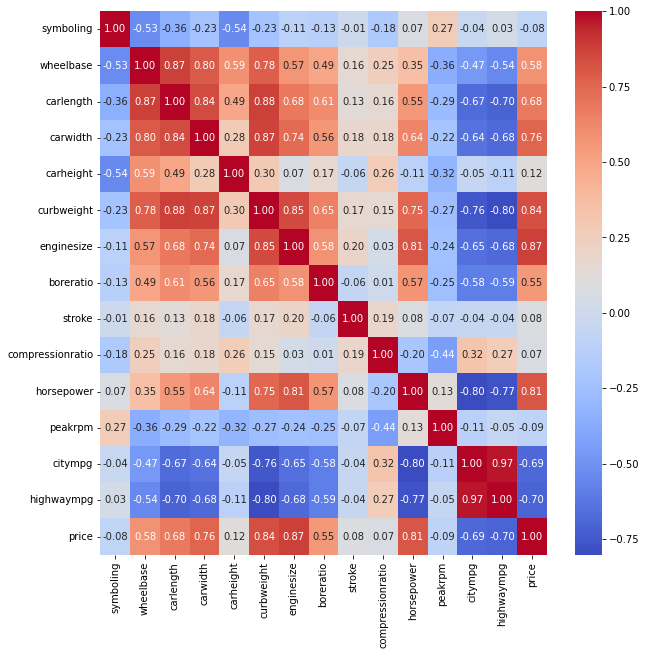

In [9]:
correlation_matrix=df.drop(columns=categorical_features).corr()
correlation_matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Finding Unique Values in Categorical Columns

In [10]:
for i in categorical_features:
    print(i,'    ',df[i].unique())
    print()

CarName      ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buic

# We can conclude that car name is not a weighted factor for price hence we will drop the column

# Univariate Analysis

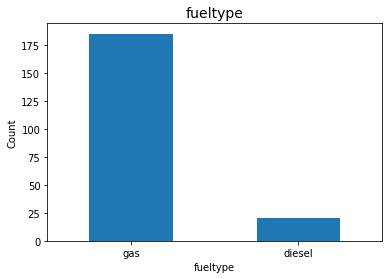

In [11]:
df["fueltype"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fueltype", fontsize=14)
plt.xlabel("fueltype")
plt.ylabel("Count")
plt.show()

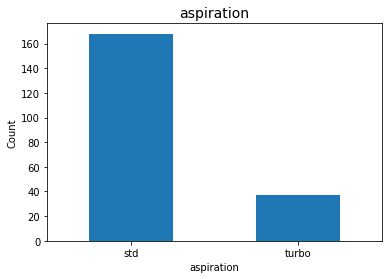

In [12]:
df["aspiration"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("aspiration", fontsize=14)
plt.xlabel("aspiration")
plt.ylabel("Count")
plt.show()

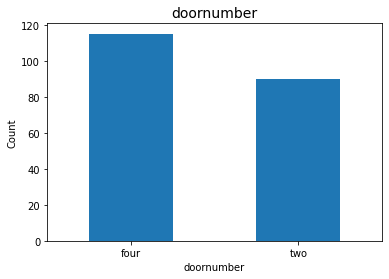

In [13]:
df["doornumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("doornumber", fontsize=14)
plt.xlabel("doornumber")
plt.ylabel("Count")
plt.show()

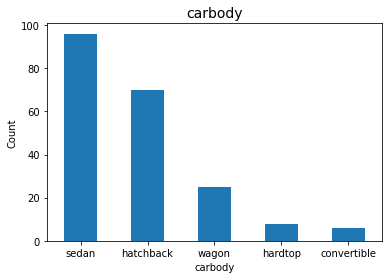

In [14]:
df["carbody"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("carbody", fontsize=14)
plt.xlabel("carbody")
plt.ylabel("Count")
plt.show()

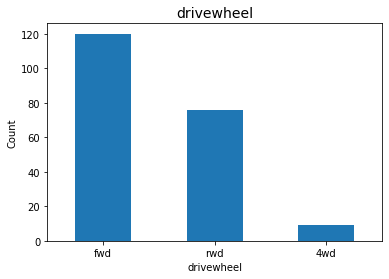

In [15]:
df["drivewheel"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("drivewheel", fontsize=14)
plt.xlabel("drivewheel")
plt.ylabel("Count")
plt.show()

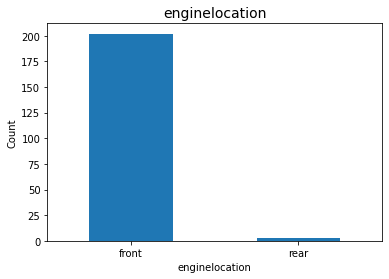

In [16]:
df["enginelocation"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("enginelocation", fontsize=14)
plt.xlabel("enginelocation")
plt.ylabel("Count")
plt.show()

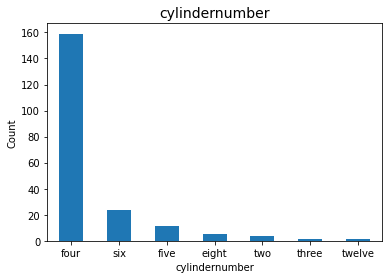

In [17]:
df["cylindernumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("cylindernumber", fontsize=14)
plt.xlabel("cylindernumber")
plt.ylabel("Count")
plt.show()

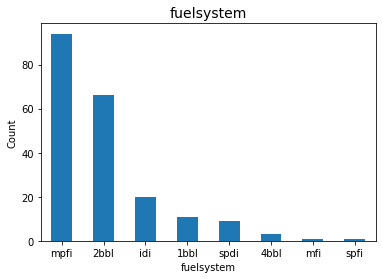

In [18]:
df["fuelsystem"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fuelsystem", fontsize=14)
plt.xlabel("fuelsystem")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis 

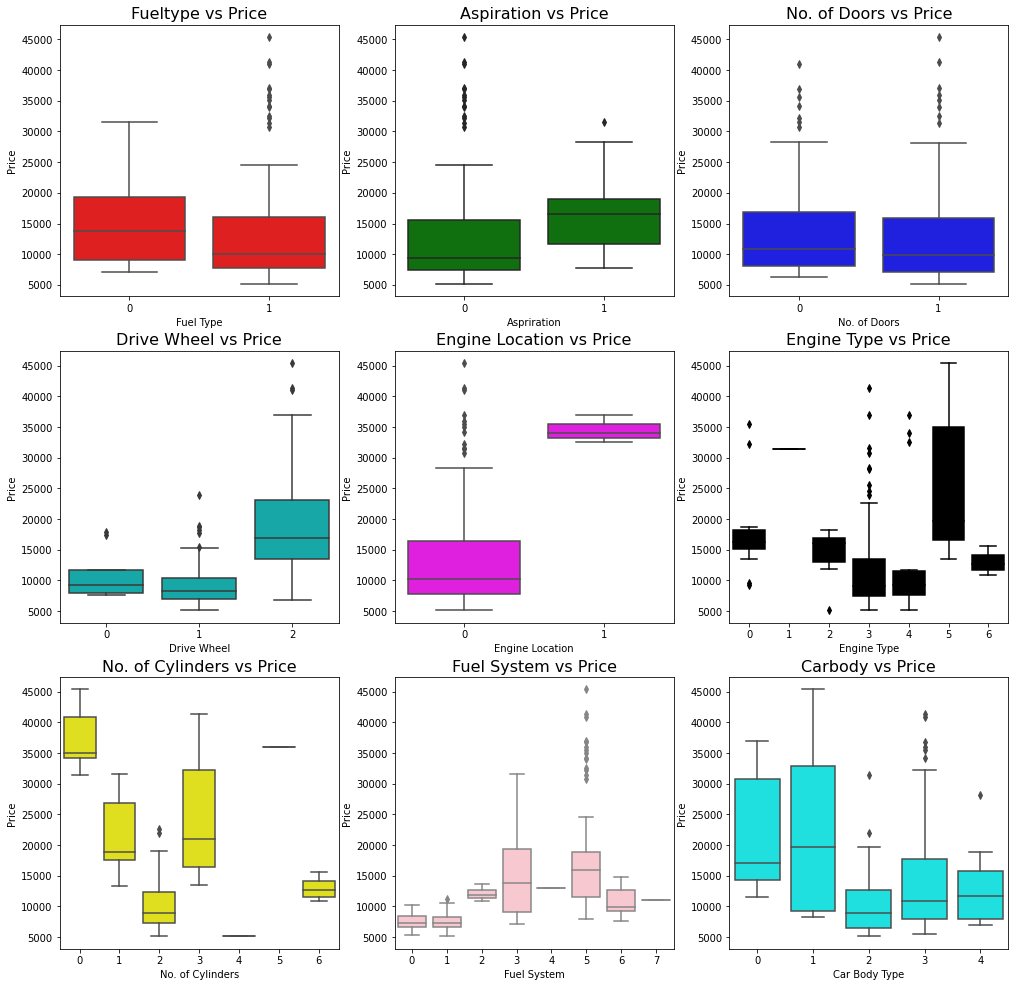

In [35]:
fig=plt.figure(figsize=(17,17))

ax=fig.add_subplot(331)
sns.boxplot(data=df, x=df["fueltype"], y=df["price"], hue=None ,color='r',ax=ax)
ax.set_title('Fueltype vs Price', fontsize=16)
plt.xlabel('Fuel Type')
plt.ylabel('Price')

ax=fig.add_subplot(332)
sns.boxplot(data=df, x=df["aspiration"], y=df["price"], hue=None ,color='g',ax=ax)
ax.set_title('Aspiration vs Price', fontsize=16)
plt.xlabel('Aspriration')
plt.ylabel('Price')

ax=fig.add_subplot(333)
sns.boxplot(data=df, x=df["doornumber"], y=df["price"], hue=None ,color='b',ax=ax)
ax.set_title('No. of Doors vs Price', fontsize=16)
plt.xlabel('No. of Doors')
plt.ylabel('Price')
 
ax=fig.add_subplot(334)
sns.boxplot(data=df, x=df["drivewheel"], y=df["price"], hue=None ,color='c',ax=ax)
ax.set_title('Drive Wheel vs Price', fontsize=16)
plt.xlabel('Drive Wheel')
plt.ylabel('Price')

ax=fig.add_subplot(335)
sns.boxplot(data=df, x=df["enginelocation"], y=df["price"], hue=None ,color='magenta',ax=ax)
ax.set_title('Engine Location vs Price', fontsize=16)
plt.xlabel('Engine Location')
plt.ylabel('Price')


ax=fig.add_subplot(336)
sns.boxplot(data=df, x=df["enginetype"], y=df["price"], hue=None ,color='black',ax=ax)
ax.set_title('Engine Type vs Price', fontsize=16)
plt.xlabel('Engine Type')
plt.ylabel('Price')

ax=fig.add_subplot(337)
sns.boxplot(data=df, x=df["cylindernumber"], y=df["price"], hue=None ,color='yellow',ax=ax)
ax.set_title('No. of Cylinders vs Price', fontsize=16)
plt.xlabel('No. of Cylinders')
plt.ylabel('Price')


ax=fig.add_subplot(338)
sns.boxplot(data=df, x=df["fuelsystem"], y=df["price"], hue=None ,color='pink',ax=ax)
ax.set_title('Fuel System vs Price', fontsize=16)
plt.xlabel('Fuel System')
plt.ylabel('Price')

ax=fig.add_subplot(339)
sns.boxplot(data=df, x=df["carbody"], y=df["price"], hue=None ,color='cyan',ax=ax)
ax.set_title('Carbody vs Price', fontsize=16)
plt.xlabel('Car Body Type')
plt.ylabel('Price')

plt.show()

In [20]:
df=df.drop(columns='CarName')
categorical_features=categorical_features[1:]

# Encoding Labels 

In [21]:
le= LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])
#This step changes categories into number. For example petrol and diesel to 0 and 1 etc.

In [29]:
pd.set_option('display.max_columns', None)

In [23]:
#dropping unnecessary data
X=df.drop(columns=["price","symboling"])
y=df["price"]


# Splitting the Dataset

In [24]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

# Applying Different Regressors

In [25]:
root_mean_squared_error=[]
r2=[]
model_names=[]

In [26]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et = ExtraTreesRegressor(random_state=42)
lr = LinearRegression()
las = Lasso()
rid = Ridge()
ada = AdaBoostRegressor()
models = [rf,gb,et,lr,las,rid,ada]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))
   
    
model_names = ['RandomForest','GradientBoost','ExtraTree','Linear','Lasso',"Ridge","AdaBoostRegressor"]
result_df = pd.DataFrame({'RMSE':root_mean_squared_error,'R2_score': r2},index=model_names)
result_df

,RMSE,R2_score
RandomForest,1938.804186,0.945746
GradientBoost,2262.128984,0.926142
ExtraTree,2508.941862,0.909146
Linear,3710.665500,0.801268
Lasso,3685.726450,0.803930
Ridge,3628.479343,0.809974
AdaBoostRegressor,2543.434958,0.906630


In [30]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [28]:
rf.fit(x_train, y_train)
rf.predict([[1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30]])

array([13122.96])

In [31]:
rf.predict([[1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26]])

array([16407.77])

# Conclusion

The dataset, CarPrice_Assignment.csv contained many values which needed to be preprocessed. Such as identifying categorical values and changing them to numeric ones. Next, we plotted some graphs to better visualize the data. Next, we used different regression models to find the model with maximum accuracy. Random Forest Regression turned out to be the model with maximum accuracy. Finally, we used some manually selected values from the dataset to predict the price.